<a href="https://colab.research.google.com/github/neilsubick/data_analytics/blob/main/COVID19_DATA_ANALYSIS_Neil_Subick%2C_Anika_Lewis%2C_Lucy_Lao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data analysis purpose

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df
#printing original data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
17609,2021-01-16,Virginia,51,429391,5706
17610,2021-01-16,Washington,53,290896,3971
17611,2021-01-16,West Virginia,54,108124,1761
17612,2021-01-16,Wisconsin,55,566275,5906


In [ ]:
df.describe()

,cases,deaths
count,1.766900e+04,17669.000000
mean,1.190759e+05,2984.598053
std,2.274607e+05,5554.979599
min,1.000000e+00,0.000000
25%,4.587000e+03,98.000000
50%,3.417400e+04,774.000000
75%,1.334700e+05,3324.000000
max,3.006583e+06,40570.000000


In [ ]:
df.head()

,state,cases,deaths,New_date
0,Washington,1,0,2020-01-21
1,Washington,1,0,2020-01-22
2,Washington,1,0,2020-01-23
3,Illinois,1,0,2020-01-24
4,Washington,1,0,2020-01-24


In [ ]:
df.tail()

,state,cases,deaths,New_date
17664,Virginia,439305,5729,2021-01-17
17665,Washington,293296,3971,2021-01-17
17666,West Virginia,108821,1776,2021-01-17
17667,Wisconsin,568166,5907,2021-01-17
17668,Wyoming,49363,522,2021-01-17


In [ ]:
print(df.dtypes)
#Checking to see if datatypes make sense, the date doesnt make sense

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object


In [ ]:
pd.to_datetime(df['date'])
#converting the date dtype from an object to datetime
New_date=pd.to_datetime(df['date'])
New_date
#Storing converted date in a Dataframe

0       2020-01-21
1       2020-01-22
2       2020-01-23
3       2020-01-24
4       2020-01-24
           ...    
17609   2021-01-16
17610   2021-01-16
17611   2021-01-16
17612   2021-01-16
17613   2021-01-16
Name: date, Length: 17614, dtype: datetime64[ns]

In [ ]:
df['New_date']=New_date
df
#adding the converted dates into the original table

,date,state,fips,cases,deaths,New_date
0,2020-01-21,Washington,53,1,0,2020-01-21
1,2020-01-22,Washington,53,1,0,2020-01-22
2,2020-01-23,Washington,53,1,0,2020-01-23
3,2020-01-24,Illinois,17,1,0,2020-01-24
4,2020-01-24,Washington,53,1,0,2020-01-24
...,...,...,...,...,...,...
17609,2021-01-16,Virginia,51,429391,5706,2021-01-16
17610,2021-01-16,Washington,53,290896,3971,2021-01-16
17611,2021-01-16,West Virginia,54,108124,1761,2021-01-16
17612,2021-01-16,Wisconsin,55,566275,5906,2021-01-16


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

**1. Analyzing New York state data for Covid 19**

In [ ]:
#Isolation of NY
df.loc[df['state']=="New York"]
New_york=df.loc[df['state']=="New York"]
New_york


,date,state,fips,cases,deaths,New_date
246,2020-03-01,New York,36,1,0,2020-03-01
261,2020-03-02,New York,36,1,0,2020-03-02
276,2020-03-03,New York,36,2,0,2020-03-03
293,2020-03-04,New York,36,11,0,2020-03-04
313,2020-03-05,New York,36,22,0,2020-03-05
...,...,...,...,...,...,...
17427,2021-01-13,New York,36,1179523,39760,2021-01-13
17482,2021-01-14,New York,36,1193710,39997,2021-01-14
17537,2021-01-15,New York,36,1213179,40203,2021-01-15
17592,2021-01-16,New York,36,1229124,40376,2021-01-16


In [ ]:
# What is the average daily case count?
Avg_Cases = New_york['cases'].mean()
Avg_Cases

449848.14241486066

In [ ]:
# What is the average daily death count?
Avg_Deaths = New_york['deaths'].mean()
Avg_Deaths

27816.811145510837

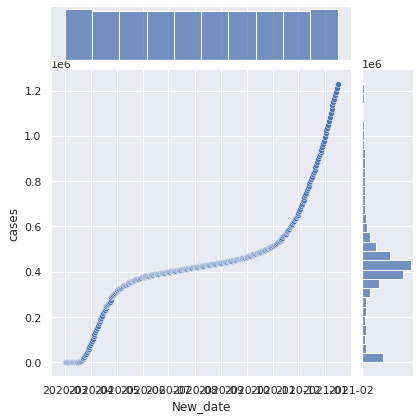

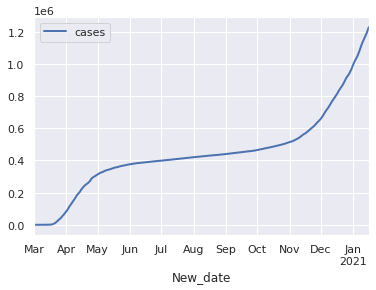

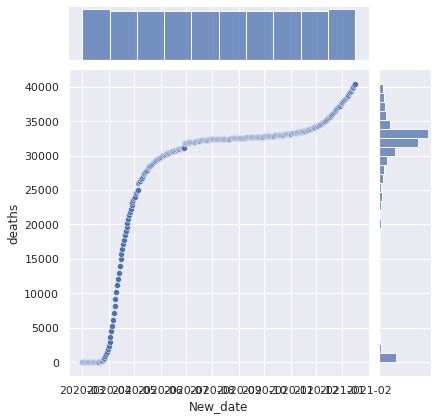

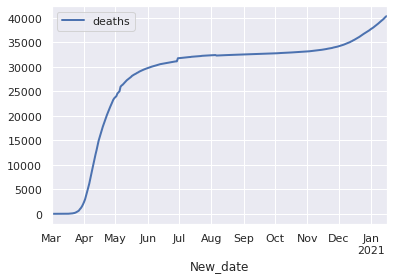

In [ ]:
sns.jointplot(x='New_date',y='cases',data=New_york)
New_york.plot(x='New_date',y='cases',linewidth=2.0)
sns.jointplot(x='New_date',y='deaths',data=New_york)
New_york.plot(x='New_date',y='deaths',linewidth=2.0)

**2. Find new covid 19 cases daily basis (new cases added everyday)**

the difference in count between the previous day and new days



In [ ]:
print(New_york.groupby(['New_date'])['deaths'].max())
print(New_york.groupby(['New_date'])['cases'].max())
#found the accumlated number of deaths & cases per day... having difficulty creating a function that isolates differences

New_date
2020-03-01        0
2020-03-02        0
2020-03-03        0
2020-03-04        0
2020-03-05        0
              ...  
2021-01-12    39588
2021-01-13    39760
2021-01-14    39997
2021-01-15    40203
2021-01-16    40376
Name: deaths, Length: 322, dtype: int64
New_date
2020-03-01          1
2020-03-02          1
2020-03-03          2
2020-03-04         11
2020-03-05         22
               ...   
2021-01-12    1164819
2021-01-13    1179523
2021-01-14    1193710
2021-01-15    1213179
2021-01-16    1229124
Name: cases, Length: 322, dtype: int64


In [ ]:
#difference in cases overtime
diff=New_york['cases'].diff()
diff

246          NaN
261          0.0
276          1.0
293          9.0
313         11.0
          ...   
17427    14704.0
17482    14187.0
17537    19469.0
17592    15945.0
17647    13694.0
Name: cases, Length: 323, dtype: float64

In [ ]:
#Add 'New Daily Cases'
New_york['New Daily Cases'] = diff
New_york

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,state,fips,cases,deaths,New_date,New Daily Cases
246,2020-03-01,New York,36,1,0,2020-03-01,NaN
261,2020-03-02,New York,36,1,0,2020-03-02,0.0
276,2020-03-03,New York,36,2,0,2020-03-03,1.0
293,2020-03-04,New York,36,11,0,2020-03-04,9.0
313,2020-03-05,New York,36,22,0,2020-03-05,11.0
...,...,...,...,...,...,...,...
17427,2021-01-13,New York,36,1179523,39760,2021-01-13,14704.0
17482,2021-01-14,New York,36,1193710,39997,2021-01-14,14187.0
17537,2021-01-15,New York,36,1213179,40203,2021-01-15,19469.0
17592,2021-01-16,New York,36,1229124,40376,2021-01-16,15945.0


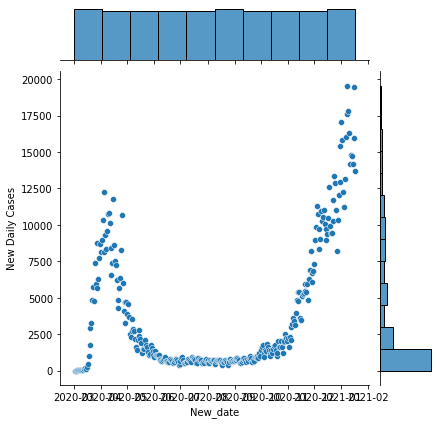

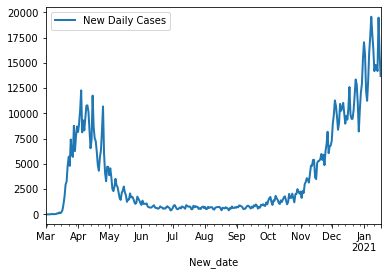

In [ ]:
# plotting New Cases over time

sns.jointplot(x='New_date', y='New Daily Cases', data=New_york)
New_york.plot(x='New_date',y='New Daily Cases',linewidth=2.0)

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
New_york.iloc[-30:]
#displaying the NY data within the last 30 days
New_york.month=New_york.iloc[-30:]
New_york.month
#storing data in a variable

,date,state,cases,deaths,New_date
15997,2020-12-18,New York,832033,35775,2020-12-18
16052,2020-12-19,New York,841946,35897,2020-12-19
16107,2020-12-20,New York,851400,36017,2020-12-20
16162,2020-12-21,New York,860856,36147,2020-12-21
16217,2020-12-22,New York,871155,36300,2020-12-22
16272,2020-12-23,New York,882895,36454,2020-12-23
16327,2020-12-24,New York,896242,36604,2020-12-24
16382,2020-12-25,New York,909123,36739,2020-12-25
16437,2020-12-26,New York,920171,36870,2020-12-26
16492,2020-12-27,New York,928376,37000,2020-12-27


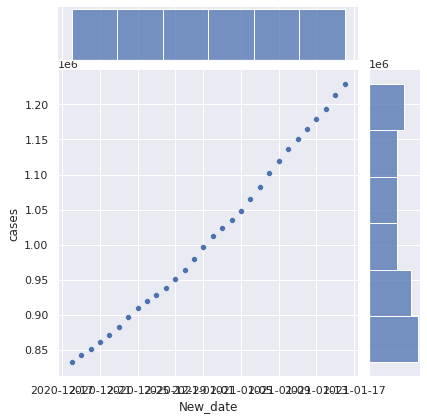

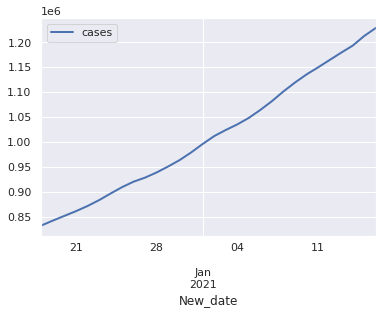

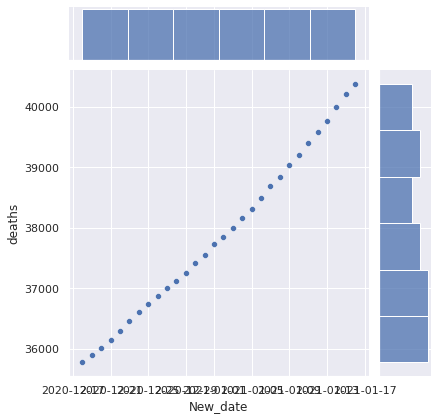

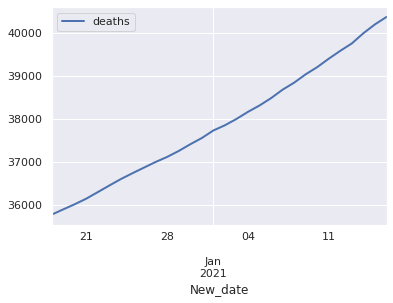

In [ ]:
sns.jointplot(x='New_date',y='cases',data=New_york.month)
New_york.month.plot(x='New_date',y='cases',linewidth=2.0)
sns.jointplot(x='New_date',y='deaths',data=New_york.month)
New_york.month.plot(x='New_date',y='deaths',linewidth=2.0)

# Task5: Comparing Covid 19 data with different states

**Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona**

In [ ]:
#Isolation of states, latest state is shown (Arizona)
df.loc[df['state']=="New York"]
df.loc[df['state']=="California"]
df.loc[df['state']=="Florida"]
df.loc[df['state']=="Texas"]
df.loc[df['state']=="Arizona"]

,date,state,fips,cases,deaths,New_date
8,2020-01-26,Arizona,4,1,0,2020-01-26
12,2020-01-27,Arizona,4,1,0,2020-01-27
16,2020-01-28,Arizona,4,1,0,2020-01-28
20,2020-01-29,Arizona,4,1,0,2020-01-29
24,2020-01-30,Arizona,4,1,0,2020-01-30
...,...,...,...,...,...,...
17396,2021-01-13,Arizona,4,643683,10689,2021-01-13
17451,2021-01-14,Arizona,4,653546,10876,2021-01-14
17506,2021-01-15,Arizona,4,662597,11060,2021-01-15
17561,2021-01-16,Arizona,4,670234,11248,2021-01-16


In [ ]:
# save states as variables
arizona=df.loc[df['state']=="Arizona"]
newyork=df.loc[df['state']=="New York"]
california=df.loc[df['state']=="California"]
florida=df.loc[df['state']=="Florida"]
texas=df.loc[df['state']=="Texas"]



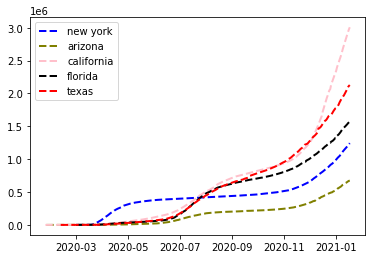

In [ ]:
# multiple line plot, case increase per state overtime
plt.plot( 'New_date', 'cases', data=newyork, marker='',color='blue', linewidth=2, linestyle='dashed',label='new york')
plt.plot( 'New_date', 'cases', data=arizona, marker='', color='olive', linewidth=2,linestyle='dashed',label='arizona')
plt.plot( 'New_date', 'cases', data=california, marker='', color='pink', linewidth=2, linestyle='dashed', label="california")
plt.plot( 'New_date', 'cases', data=florida, marker='', color='black', linewidth=2, linestyle='dashed', label="florida")
plt.plot( 'New_date', 'cases', data=texas, marker='', color='red', linewidth=2, linestyle='dashed', label="texas")
plt.legend()


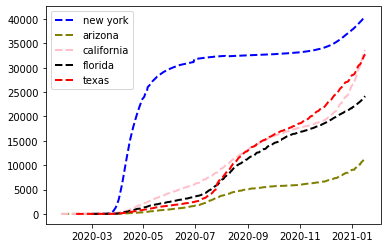

In [ ]:
# multiple line plot, death increase per state overtime
plt.plot( 'New_date', 'deaths', data=newyork, marker='',color='blue', linewidth=2, linestyle='dashed',label='new york')
plt.plot( 'New_date', 'deaths', data=arizona, marker='', color='olive', linewidth=2,linestyle='dashed',label='arizona')
plt.plot( 'New_date', 'deaths', data=california, marker='', color='pink', linewidth=2, linestyle='dashed', label="california")
plt.plot( 'New_date', 'deaths', data=florida, marker='', color='black', linewidth=2, linestyle='dashed', label="florida")
plt.plot( 'New_date', 'deaths', data=texas, marker='', color='red', linewidth=2, linestyle='dashed', label="texas")
plt.legend()


# Task6: Conclusion

Below are the conclusions:

1.   Task 3
          a.Since March 1, 2020, cases and deaths from COVID-19 have been increasing on an upward curve.
          b.The average daily case count in New York is 447,385.
          c.The average daily death count in New York is 27,777.
          d.In the beginning, the case count and the death count were both increasing. 
          As time went on, the death count started to decrease as the case increased. 
          This could be attributed to effective treatments and a better understanding of the virus.
          
2.  Task 4
          a.In the past 30 days, New York as seen a steady increase in both cases and deaths.
3. Task 5
          a.Comparing New York cases to other states after July 2020, we see a leveling of cases until Nov 2020. 
          b.After Nov 2020, cases start rising in five states with the biggest rise in California, Texas and Florida.
          This is followed by New York and Arizona.
          c.Comparing New York total deaths to other states after July 2020, New York still has the highest death toll. 
          d.However, after November 2020, Texas and California's death toll is steadily rising followed by Florida and Arizona.
          e.California's death toll matched the death toll of Texas and then surpased it.
          The rise in cases can be contributed to numerous factors including holiday travel and the 2020 election.

      
 







